In [1]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,1,0,1


In [14]:
X=pd.concat([X,geography,gender],axis=1)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_train.shape

(8000, 14)

In [19]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [20]:
# Initialising the ANN
classifier = Sequential()


In [21]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,activation='relu',input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 6, activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [22]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [27]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)



In [28]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 6ms/step - loss: 0.7339 - accuracy: 0.5014 - val_loss: 0.6288 - val_accuracy: 0.7664
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.5807 - accuracy: 0.7925 - val_loss: 0.5356 - val_accuracy: 0.7959
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.5048 - accuracy: 0.7966 - val_loss: 0.4819 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4734 - accuracy: 0.7966 - val_loss: 0.4662 - val_accuracy: 0.7963
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4597 - accuracy: 0.7972 - val_loss: 0.4555 - val_accuracy: 0.7970
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4475 - accuracy: 0.7988 - val_loss: 0.4454 - val_accuracy: 0.8008
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4369 - accuracy: 0.8026 - val_loss: 0.4373 - val_accuracy:

In [31]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10,epochs = 100)


Epoch 1/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3410 - accuracy: 0.8602 - val_loss: 0.3645 - val_accuracy: 0.8466
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3403 - accuracy: 0.8625 - val_loss: 0.3637 - val_accuracy: 0.8470
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8617 - val_loss: 0.3635 - val_accuracy: 0.8466
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8621 - val_loss: 0.3630 - val_accuracy: 0.8466
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8627 - val_loss: 0.3624 - val_accuracy: 0.8474
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8617 - val_loss: 0.3621 - val_accuracy: 0.8455
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3376 - accuracy: 0.8625 - val_loss: 0.3618 - val_accuracy: 0.8466

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


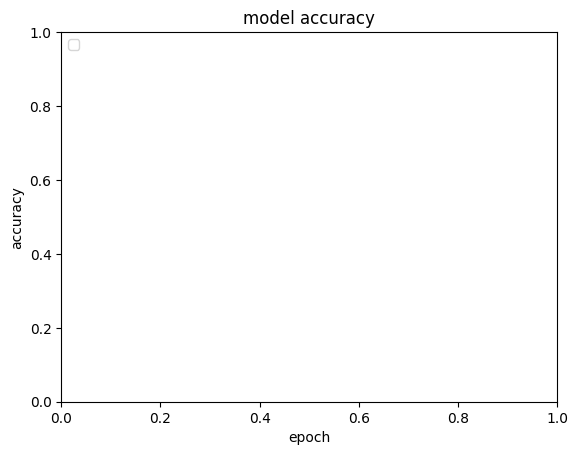

In [34]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
#plt.plot(model_history.history['acc'])
#plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

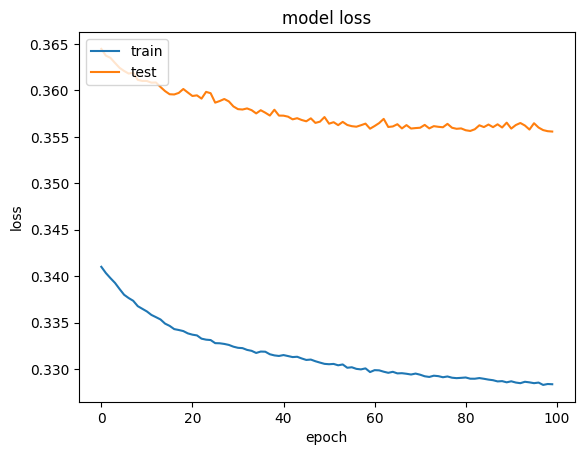

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

63/63 [==============================] - 0s 1ms/step
